# Stats

## Corpus (all 40 odes)

In [ ]:
from src.stats_comp import compatibility_canticum, compatibility_corpus, compatibility_ratios_to_stats

def count_leaves(obj):
    """Count all leaf (non-list) elements in a nested structure."""
    if isinstance(obj, list):
        return sum(count_leaves(item) for item in obj)
    else:
        return 1

all_ratio_sets_triads = compatibility_corpus('data/compiled/triads/')
all_ratio_sets_triads_ba = compatibility_canticum('data/compiled/extra/ba05.xml', 'ba05')
all_ratio_sets_strophes = compatibility_corpus('data/compiled/strophes/')
all_ratio_sets_epodes = compatibility_corpus('data/compiled/epodes/')

total_comp_triads = compatibility_ratios_to_stats(all_ratio_sets_triads)
total_comp_triads_ba = compatibility_ratios_to_stats(all_ratio_sets_triads_ba)
total_comp_strophes = compatibility_ratios_to_stats(all_ratio_sets_strophes)
total_comp_epodes = compatibility_ratios_to_stats(all_ratio_sets_epodes)

# Count total number of variables ("leaf values")
total_triads = sum(count_leaves(lst) for lst in all_ratio_sets_triads)
total_triads_ba = sum(count_leaves(lst) for lst in all_ratio_sets_triads_ba)
total_strophes = sum(count_leaves(lst) for lst in all_ratio_sets_strophes)
total_epodes = sum(count_leaves(lst) for lst in all_ratio_sets_epodes)

print ('--------------------------------------------')
print(f'\033[1;33mTRIADS\033[0m\n')
print(f'\033[33mPindar\033[0m: Total corpus comp (all 40 odes): \033[1;32m{total_comp_triads}\033[0m')
print(f'Number of variables: {total_triads}')

print(f'\033[33mBacchylides\033[0m: Ba. 5: \033[1;32m{total_comp_triads_ba}\033[0m')
print(f'Number of variables: {total_triads_ba}')

#print(f'\033[33mBaseline\033[0m: \033[1;32m{total_comp_triads_ba}\033[0m')
#print(f'Number of variables: {total_triads_ba}')
print ('--------------------------------------------')

print("\n")
print ('--------------------------------------------')
print(f'\033[1;33mSTROPHES\033[0m\n')
print(f'\033[33mPindar\033[0m: Total corpus comp: \033[1;32m{total_comp_strophes}\033[0m')
print(f'Number of variables: {total_strophes}')
print ('--------------------------------------------')

print("\n")
print ('--------------------------------------------')
print(f'\033[1;33mEPODES\033[0m\n')
print(f'\033[33mPindar\033[0m: Total corpus comp: \033[1;32m{total_comp_epodes}\033[0m')
print(f'Number of variables: {total_epodes}')
print ('--------------------------------------------')



5it [00:00,  5.67it/s]                       
5it [00:00, 10.42it/s]                       
5it [00:00, 21.23it/s]                       

--------------------------------------------
TRIADS

Pindar: Total corpus comp (all 40 odes): 0.7749745915592592
Number of variables: 11179
Bacchylides: Total corpus comp (Ba. 5): 0.7484162895927602
Number of variables: 221
--------------------------------------------


--------------------------------------------
STROPHES

Total corpus comp: 0.7256545951931218
Number of variables: 3543
--------------------------------------------


--------------------------------------------
EPODES

Total corpus comp: 0.7833079934483543
Number of variables: 3491
--------------------------------------------


Let's also compute values for all individual odes and compare with their baselines 

In [1]:
import os 

from src.stats_comp import compatibility_canticum, compatibility_play, compatibility_ratios_to_stats
from results import victory_odes

in_folder_odes_triads = "data/compiled/triads/"
in_folder_baselines_triads = "data/compiled/baselines/triads/prose/"
in_folder_baselines_triads_lyric = "data/compiled/baselines/triads/lyric/"

ode_comp_scores = {}
baseline_prose_comp_scores = {}
baseline_lyric_comp_scores = {}

index = 0
for ode in victory_odes:
    index += 1

    if ode[:2] == 'py':
        ode_path = os.path.join(in_folder_odes_triads, "ht_pythians_triads.xml")
    elif ode[:2] == 'ne':
        ode_path = os.path.join(in_folder_odes_triads, "ht_nemeans_triads.xml")
    elif ode[:2] == 'ol':
        ode_path = os.path.join(in_folder_odes_triads, "ht_olympians_triads.xml")
    elif ode[:2] == 'is':
        ode_path = os.path.join(in_folder_odes_triads, "ht_isthmians_triads.xml")

    baseline_path = os.path.join(in_folder_baselines_triads, f"baseline_prose_{ode}.xml")
    baseline_lyric_path = os.path.join(in_folder_baselines_triads_lyric, f"baseline_lyric_{ode}.xml")
    
    ode_ratios = compatibility_canticum(ode_path, ode)
    baseline_ratios = compatibility_play(baseline_path)
    baseline_lyric_ratios = compatibility_play(baseline_lyric_path)
    
    ode_comp = compatibility_ratios_to_stats(ode_ratios)
    baseline_comp = compatibility_ratios_to_stats(baseline_ratios)
    baseline_lyric_comp = compatibility_ratios_to_stats(baseline_lyric_ratios)

    ode_comp_scores[ode] = ode_comp
    baseline_prose_comp_scores[ode] = baseline_comp
    baseline_lyric_comp_scores[ode] = baseline_lyric_comp

    print ('--------------------------------------------')
    print(f'\033[1;32m{index}\033[0m')
    print(f'ODE {ode} TRIADS:')
    print(f'Ode comp: \033[1;32m{ode_comp:.2f}\033[0m')
    print(f'Baseline (prose) comp: \033[1;32m{baseline_comp:.2f}\033[0m')
    print(f'Baseline (lyric) comp: \033[1;32m{baseline_lyric_comp:.2f}\033[0m')
    print ('--------------------------------------------')

print(max(ode_comp_scores.values()))
print(max(baseline_prose_comp_scores.values()))
print(max(baseline_lyric_comp_scores.values()))
for (ode_key, ode_value), (baseline_key, baseline_value) in zip(ode_comp_scores.items(), baseline_prose_comp_scores.items()):
    if ode_value < baseline_value:
        print(f'Prose baseline better than ode for {ode_key}: ode {ode_value} < baseline {baseline_value}')
for (ode_key, ode_value), (baseline_key, baseline_value) in zip(ode_comp_scores.items(), baseline_lyric_comp_scores.items()):
    if ode_value < baseline_value:
        print(f'Lyric baseline better than ode for {ode_key}: ode {ode_value} < baseline {baseline_value}')


with open('results.py', 'a', encoding='utf-8') as f:
    # content = ',\n'.join(f"\t'{key}': {value}" for key, value in ode_comp_scores.items())
    # f.write(f'ode_comp_scores = {{\n{content}\n}}')

    baseline_content = ',\n'.join(f"\t'{key}': {value}" for key, value in baseline_prose_comp_scores.items())
    f.write(f'\nbaseline_prose_comp_scores = {{\n{baseline_content}\n}}')

    baseline_lyric_content = ',\n'.join(f"\t'{key}': {value}" for key, value in baseline_lyric_comp_scores.items())
    f.write(f'\nbaseline_lyric_comp_scores = {{\n{baseline_lyric_content}\n}}')

--------------------------------------------
1
ODE is01 TRIADS:
Ode comp: 0.75
Baseline (prose) comp: 0.74
Baseline (lyric) comp: 0.74
--------------------------------------------
--------------------------------------------
2
ODE is02 TRIADS:
Ode comp: 0.82
Baseline (prose) comp: 0.79
Baseline (lyric) comp: 0.79
--------------------------------------------
--------------------------------------------
3
ODE is04 TRIADS:
Ode comp: 0.76
Baseline (prose) comp: 0.75
Baseline (lyric) comp: 0.74
--------------------------------------------
--------------------------------------------
4
ODE is05 TRIADS:
Ode comp: 0.78
Baseline (prose) comp: 0.79
Baseline (lyric) comp: 0.79
--------------------------------------------
--------------------------------------------
5
ODE is06 TRIADS:
Ode comp: 0.80
Baseline (prose) comp: 0.79
Baseline (lyric) comp: 0.79
--------------------------------------------
--------------------------------------------
6
ODE is07 TRIADS:
Ode comp: 0.81
Baseline (prose) comp

## Groupings

### By collection

In [ ]:
from src.stats_comp import compatibility_play, compatibility_ratios_to_stats

def collection_stats(collection: str):
    all_ratio_sets_triads = compatibility_play(f'data/compiled/triads/ht_{collection}_triads.xml')
    all_ratio_sets_strophes = compatibility_play(f'data/compiled/strophes/ht_{collection}_strophes.xml')
    all_ratio_sets_epodes = compatibility_play(f'data/compiled/epodes/ht_{collection}_epodes.xml')

    total_comp_triads = compatibility_ratios_to_stats(all_ratio_sets_triads)
    total_comp_strophes = compatibility_ratios_to_stats(all_ratio_sets_strophes)
    total_comp_epodes = compatibility_ratios_to_stats(all_ratio_sets_epodes)

    return total_comp_triads, total_comp_strophes, total_comp_epodes

total_comp_triads_olympians, total_comp_strophes_olympians, total_comp_epodes_olympians = collection_stats('olympians')
total_comp_triads_pythians, total_comp_strophes_pythians, total_comp_epodes_pythians = collection_stats('pythians')
total_comp_triads_nemeans, total_comp_strophes_nemeans, total_comp_epodes_nemeans = collection_stats('nemeans')
total_comp_triads_isthmians, total_comp_strophes_isthmians, total_comp_epodes_isthmians = collection_stats('isthmians')

print ('--------------------------------------------')
print(f'OLYMPIANS')
print(f'Total comp triads: \033[1;32m{total_comp_triads_olympians}\033[0m')
print(f'Total comp strophes: \033[1;32m{total_comp_strophes_olympians}\033[0m')
print(f'Total comp epodes: \033[1;32m{total_comp_epodes_olympians}\033[0m')

print ('--------------------------------------------')
print(f'PYTHIANS')
print(f'Total comp triads: \033[1;32m{total_comp_triads_pythians}\033[0m')
print(f'Total comp strophes: \033[1;32m{total_comp_strophes_pythians}\033[0m')
print(f'Total comp epodes: \033[1;32m{total_comp_epodes_pythians}\033[0m')

print ('--------------------------------------------')
print(f'NEMEANS')
print(f'Total comp triads: \033[1;32m{total_comp_triads_nemeans}\033[0m')
print(f'Total comp strophes: \033[1;32m{total_comp_strophes_nemeans}\033[0m')
print(f'Total comp epodes: \033[1;32m{total_comp_epodes_nemeans}\033[0m')

print ('--------------------------------------------')
print(f'ISTHMIANS')
print(f'Total comp triads: \033[1;32m{total_comp_triads_isthmians}\033[0m')
print(f'Total comp strophes: \033[1;32m{total_comp_strophes_isthmians}\033[0m')
print(f'Total comp epodes: \033[1;32m{total_comp_epodes_isthmians}\033[0m')



### By strophicity

In [6]:
from src.stats_comp import compatibility_canticum, compatibility_ratios_to_stats

# (1) get responsion attribute of all cantica with the same strophicity

from lxml import etree
from collections import Counter
from pathlib import Path

def count_canticum_elements(xml_dir):
    """
    Count total number of canticum elements across all XML files in a directory.
    
    Args:
        xml_dir: Path to directory containing XML files
    
    Returns:
        int: Total count of cantica elements
    """
    xml_path = Path(xml_dir)
    total_cantica = 0
    
    # Iterate through all XML files in the directory
    for xml_file in xml_path.glob('*.xml'):
        try:
            tree = etree.parse(str(xml_file))
            root = tree.getroot()
            
            # Query for all cantica elements
            cantica = root.xpath('//canticum')
            total_cantica += len(cantica)
            
        except Exception as e:
            print(f"Error processing {xml_file}: {e}")
            continue
    
    return total_cantica

def count_strophe_responsions(xml_dir):
    """
    Count occurrences of each unique responsion attribute in strophe elements
    across all XML files in a directory.
    
    Args:
        xml_dir: Path to directory containing XML files
    
    Returns:
        dict: Dictionary with responsion attributes as keys and counts as values
    """
    xml_path = Path(xml_dir)
    all_responsions = []
    
    # Iterate through all XML files in the directory
    for xml_file in xml_path.glob('*.xml'):
        try:
            tree = etree.parse(str(xml_file))
            root = tree.getroot()
            
            # Query for all strophe elements
            strophes = root.xpath('//strophe')
            
            # Extract responsion attributes
            responsions = [strophe.get('responsion') for strophe in strophes]
            all_responsions.extend(responsions)
            
        except Exception as e:
            print(f"Error processing {xml_file}: {e}")
            continue
    
    # Use Counter to create a dict of counts
    responsion_counts = dict(Counter(all_responsions))
    total = sum(responsion_counts.values())
    
    return responsion_counts, total

triads_dir = 'data/compiled/triads/'
strophes_dir = 'data/compiled/strophes/'

triad_responsion_counts, triad_total = count_strophe_responsions(triads_dir)
triad_cantica_count = count_canticum_elements(triads_dir)
strophe_responsion_counts, strophe_total = count_strophe_responsions(strophes_dir)
strophe_cantica_count = count_canticum_elements(strophes_dir)

print("Triad Responsion Counts:")
print(triad_responsion_counts)
print(f"Total refrains: {triad_total}")
print(f"Total cantica in triads: {triad_cantica_count}\n")

print("Strophe Responsion Counts:")
print(strophe_responsion_counts)
print(f"Total refraims: {strophe_total}")
print(f"Total cantica in strophes: {strophe_cantica_count}")


Triad Responsion Counts:
{'ne01': 4, 'ne02': 5, 'ne03': 4, 'ne04': 12, 'ne05': 3, 'ne06': 3, 'ne07': 5, 'ne08': 3, 'ne09': 11, 'ne10': 5, 'ne11': 3, 'is01': 4, 'is02': 3, 'is04': 5, 'is05': 3, 'is06': 3, 'is07': 3, 'is08': 7, 'py01': 5, 'py02': 4, 'py03': 5, 'py04': 13, 'py05': 4, 'py06': 6, 'py07': 1, 'py08': 5, 'py09': 5, 'py10': 4, 'py11': 4, 'py12': 4, 'ol01': 4, 'ol02': 5, 'ol03': 3, 'ol04': 1, 'ol05': 3, 'ol06': 5, 'ol07': 5, 'ol08': 4, 'ol09': 4, 'ol10': 5, 'ol11': 1, 'ol12': 1, 'ol13': 5, 'ol14': 2}
Total refrains: 194
Total cantica in triads: 44

Strophe Responsion Counts:
{'ol01': 8, 'ol02': 10, 'ol03': 6, 'ol04': 2, 'ol05': 6, 'ol06': 10, 'ol07': 10, 'ol08': 8, 'ol09': 8, 'ol10': 10, 'ol11': 2, 'ol12': 2, 'ol13': 10, 'is01': 8, 'is02': 6, 'is03': 8, 'is04': 6, 'is05': 6, 'is06': 6, 'ne01': 8, 'ne03': 8, 'ne05': 6, 'ne06': 6, 'ne07': 10, 'ne08': 6, 'ne10': 10, 'ne11': 6, 'py01': 10, 'py02': 8, 'py03': 10, 'py04': 26, 'py05': 8, 'py07': 2, 'py08': 10, 'py09': 10, 'py10': 8, 'p

# Heatmaps

## Single heatmap

Let's first make a text matrix of the sylls of the first strophe, to have something as a handy reference overlay on the heatmap.

In [ ]:
from src.utils.utils import get_text_matrix

# Print the shape
text_matrix, row_lengths = get_text_matrix("data/compiled/ht_olympians_triads.xml", canticum_index=1)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]
print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

Here's a full code for making a heatmap with text overlay, for both the triads and the strophes and antistrophes considered as responding with each other (there's no use heatmapping the epodes, since they are just the lowest part of the triads).

Use the `text_overlay=True` boolean to add text; note that the overlay mapping does not work well for songs where resolutions respond with unresolved longs.

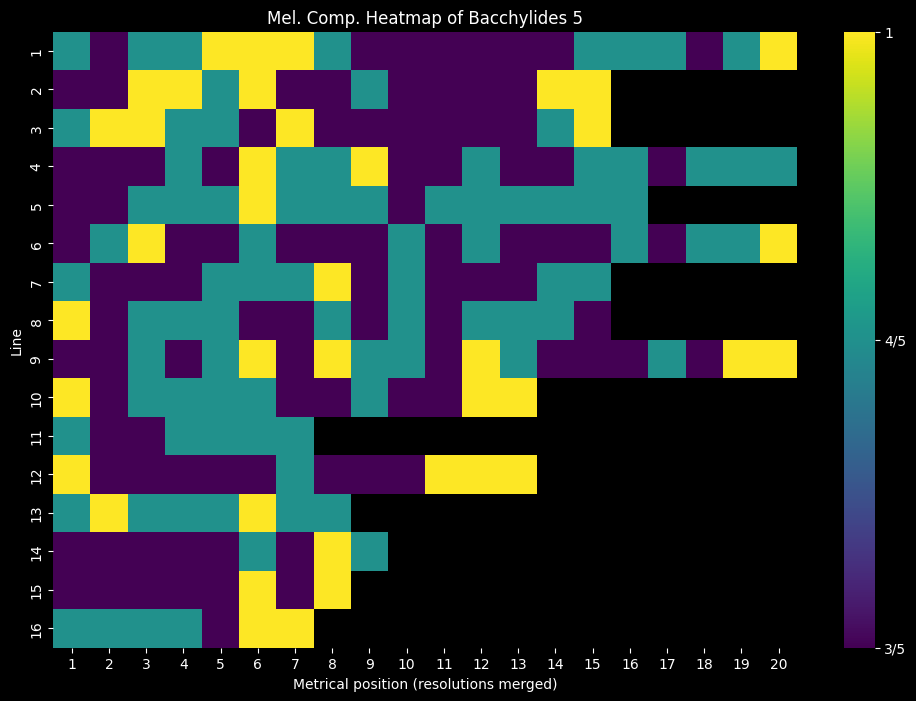

In [2]:
from src.heatmaps import make_one_heatmap

make_one_heatmap("data/compiled/extra/ba05.xml", "media/heatmaps/bacchylides", "ba05", "Mel. Comp. Heatmap of Bacchylides 5", representative_strophe=1, save=True, show=True, dark_mode=True, text_overlay=False)

In [ ]:
from src.heatmaps import make_one_heatmap

make_one_heatmap("data/compiled/extra/test.xml", "media/heatmaps/extra", "te01", "Test Mel. Comp. Heatmap", representative_strophe=1, save=False, show=True, dark_mode=True, text_overlay=False)

In [ ]:
from src.heatmaps import make_one_heatmap

for i in range(1, 10):
    make_one_heatmap("data/compiled/responsion_ach_compiled.xml", "media/heatmaps/ach/", f"ach0{i}", f"Mel. Comp. Heatmap of Acharnenses {i}", representative_strophe=1, save=False, show=True, dark_mode=True, text_overlay=False)

Of course, we want to make individual heatmaps for each and every canticum in the corpus. 

In [ ]:
import os
from tqdm import tqdm

from src.utils.utils import get_canticum_ids
from src.heatmaps import canticum_number_of_strophes, canticum_with_at_least_two_strophes, make_one_heatmap

###### SETTINGS #######

responding_unit = "strophes"  # "triads", "strophes"
overlay = True
dark = not overlay

make_assert = False

#######################

folder = f"data/compiled/{responding_unit}/"

if overlay:
    out_folder = f"media/heatmaps/{responding_unit}/text/"
else:
    out_folder = f"media/heatmaps/{responding_unit}/notext/"

groups = [[f"ht_olympians_{responding_unit}.xml", "Olympia"], [f"ht_pythians_{responding_unit}.xml", "Pythia"], [f"ht_nemeans_{responding_unit}.xml", "Nemea"], [f"ht_isthmians_{responding_unit}.xml", "Isthmia"]]
for group in groups:
    xml_path = os.path.join(folder, group[0])
    responsion_attributes = get_canticum_ids(xml_path)
    print(f"Canticum IDs in {group[1]}: {responsion_attributes}")

    for responsion_attribute in tqdm(responsion_attributes):
        if not canticum_with_at_least_two_strophes(xml_path, responsion_attribute):
            print(f"Skipping {responsion_attribute} in {group[1]} (less than 2 strophes).")
            continue
        
        if responsion_attribute == "ol02":
            print(f"Skipping {responsion_attribute} in {group[1]} (known data issue).")
            continue

        print(f"Generating heatmap for {group[1]} with responsion attribute {responsion_attribute}...")
        
        nr_of_refrains = canticum_number_of_strophes(xml_path, responsion_attribute)

        number = int(responsion_attribute[2:])
        if responding_unit == "strophes":
            title = f"Mel. Comp. Heatmap of {group[1]} {number} (Strophic-Antistrophic, {nr_of_refrains} refrains)"
        else:
            title = f"Mel. Comp. Heatmap of {group[1]} {number} ({nr_of_refrains} refrains)"
        make_one_heatmap(xml_path, out_folder, responsion_attribute, title, representative_strophe=1, save=True, show=False, dark_mode=dark, text_overlay=overlay)

print(len(os.listdir(out_folder)))
if make_assert:
    assert len(os.listdir(out_folder)) == 40

A nice way to compare two heatmaps is to make a gif with Pillow:

In [ ]:
from PIL import Image

png_files = [
    "media/plots/heatmaps/is04.png",
    "media/plots/heatmaps/is04_eric.png"
]

frames = [Image.open(f).convert("P", palette=Image.ADAPTIVE, colors=256) for f in png_files]

frames[0].save(
    "conj_is04.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,  # ms
    loop=0,
    optimize=False
)

### Poster

A striking aesthetic effect can be achieved by removing all text, a good fit for posters:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.stats_comp import compatibility_play, compatibility_canticum

#data = compatibility_play('data/compiled/py04.xml')
data = compatibility_canticum('data/compiled/triads/ht_isthmians_triads.xml', "is04")

data_matrix = data

num_rows_data = len(data_matrix)
max_len_data = max(len(row) for row in data_matrix)

# -----------------------------
# Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row

# -----------------------------
# Plot heatmap (dark mode, no text overlay)
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data, 
    cmap="viridis", 
    mask=np.isnan(padded_data), 
    cbar=True,
    vmax = 1
)

# Dark background + white labels
ax.set_facecolor("black")
ax.figure.set_facecolor("black")
ax.tick_params(colors="white")  # tick labels
ax.xaxis.label.set_color("white")
ax.yaxis.label.set_color("white")
ax.title.set_color("white")

# plt.xlabel("Metrical position (resolutions merged)")
# plt.ylabel("Line number (Snell-Maehler)")
# plt.title("Melodic-Comp. Heatmap of Pythia 4")
# plt.yticks(
#     ticks=np.arange(len(data_matrix)) + 0.5,
#     labels=np.arange(1, len(data_matrix)+1)
# )
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("media/plots/heatmap_notext_invertedcolours_pythia_4_comp.png", dpi=600)
plt.show()

## Set of heatmaps

### Olympians 

In [ ]:
from src.heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/triads/ht_olympians_triads.xml', prefix="ol", suptitle="Melodic Compatibility Heatmaps - Olympians (triads)")

### Isthmians

In [ ]:
from src.heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_isthmians_triads.xml', prefix="is", suptitle="Melodic Compatibility Heatmaps - Isthmians")

### Nemeans

In [ ]:
from src.heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_nemeans_triads.xml', prefix="ne", suptitle="Melodic Compatibility Heatmaps - Nemeans")

### Pythians

In [ ]:
from src.heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_pythians_triads.xml', prefix="py", suptitle="Melodic Compatibility Heatmaps - Pythians")